#  Train a GPT-2 Text-Generating Model w/ GPU For Free 

##Instalar GPT-2


In [1]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

##Importar Librerias para Limpiesa de Datos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import io
import re

##Conectando a Google Driver

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##GPU

Colaboratory usa una GPU Nvidia T4 o una GPU Nvidia K80. El T4 es un poco más rápido que el antiguo K80 para entrenar GPT-2 y tiene más memoria que le permite entrenar los modelos GPT-2 más grandes y generar más texto.

Puede verificar qué GPU está activa ejecutando la siguiente celda.

In [4]:
!nvidia-smi

Mon Jan  2 00:00:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Procesando Datos

In [5]:
url = '/content/drive/MyDrive/dataanime_10000.csv'
url_1 = '/content/drive/MyDrive/dataanime_3900.csv'

In [6]:
df = pd.read_csv(url)
df_1 = pd.read_csv(url_1)

In [7]:
df

,Titulo,Synopsis
0,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...
1,Bleach: Sennen Kessen-hen\nBleach: Thousand-Ye...,Substitute Soul Reaper Ichigo Kurosaki spends ...
2,Kaguya-sama wa Kokurasetai: Ultra Romantic\nKa...,The elite members of Shuchiin Academy's studen...
3,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...
4,Gintama°\nGintama Season 4,"Gintoki, Shinpachi, and Kagura return as the f..."
...,...,...
9995,Rurouni Kenshin: Meiji Kenkaku Romantan\nRurou...,In the final years of the Bakumatsu era lived ...
9996,Shirobako,"It all started in Kaminoyama High School, when..."
9997,Steins;Gate: Oukoubakko no Poriomania\nSteins;...,"A few months after the events of Steins;Gate, ..."
9998,Ao Ashi,"In a quiet rural town, the spotlight of a loca..."


In [8]:
df_1

,Titulo,Synopsis
0,Tsuki ga Kirei,With a new school year comes a new crowd of cl...
1,Koukyoushihen Eureka Seven\nEureka Seven,In the backwater town of Bellforest lives a 14...
2,Kyou kara Ore wa!!,"Two transfer students, Mitsuhashi Takashi and ..."
3,Omoide no Marnie\nWhen Marnie Was There,"Suffering from frequent asthma attacks, young ..."
4,Shijou Saikyou no Deshi Kenichi\nKenIchi: The ...,Whenever he isn't getting pummeled in the kara...
...,...,...
3895,Wotaku ni Koi wa Muzukashii\nWotakoi: Love is ...,"Having slept through all four of her alarms, t..."
3896,Aria the Benedizione,The successor and branch manager of the Himeya...
3897,Bungou Stray Dogs Wan!,Atsushi Nakajima has finally grown accustomed ...
3898,Girls & Panzer: Saishuushou Part 1\nGirls und ...,"Rumor has it that Momo Kawashima, former stude..."


In [9]:
pd.set_option('display.max_colwidth', None)
df["Synopsis"]  = df["Synopsis"].str.replace('"','').str.replace('-',',').str.replace('—',',')
ds = pd.DataFrame(df["Synopsis"])

In [10]:
ds.shape

(10000, 1)

In [11]:
ds.columns

Index(['Synopsis'], dtype='object')

In [12]:
pd.set_option('display.max_colwidth', None)
df_1["Synopsis"]  = df_1["Synopsis"].str.replace('"','').str.replace('-',',').str.replace('—',',')
ds_1 = pd.DataFrame(df_1["Synopsis"])

In [13]:
ds_1.shape

(3900, 1)

In [14]:
ds_1.columns

Index(['Synopsis'], dtype='object')

In [15]:
ds

,Synopsis
0,"After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio,mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing automail, a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone,a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname Fullmetal, the boys' journey embroils them in a growing conspiracy that threatens the fate of the world.\n\n[Written by MAL Rewrite]"
1,"Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakura Town. Ichigo carries out his quest with his closest allies: Orihime Inoue, his childhood friend with a talent for healing; Yasutora Sado, his high school classmate with superhuman strength; and Uryuu Ishida, Ichigo's Quincy rival.\n\nIchigo's vigilante routine is disrupted by the sudden appearance of Asguiaro Ebern, a dangerous Arrancar who heralds the return of Yhwach, an ancient Quincy king. Yhwach seeks to reignite the historic blood feud between Soul Reaper and Quincy, and he sets his sights on erasing both the human world and the Soul Society for good.\n\nYhwach launches a two,pronged invasion into both the Soul Society and Hueco Mundo, the home of Hollows and Arrancar. In retaliation, Ichigo and his friends must fight alongside old allies and enemies alike to end Yhwach's campaign of carnage before the world itself comes to an end.\n\n[Written by MAL Rewrite]"
2,"The elite members of Shuchiin Academy's student council continue their competitive day,to,day antics. Council president Miyuki Shirogane clashes daily against vice,president Kaguya Shinomiya, each fighting tooth and nail to trick the other into confessing their romantic love. Kaguya struggles within the strict confines of her wealthy, uptight family, rebelling against her cold default demeanor as she warms to Shirogane and the rest of her friends.\n\nMeanwhile, council treasurer Yuu Ishigami suffers under the weight of his hopeless crush on Tsubame Koyasu, a popular upperclassman who helps to instill a new confidence in him. Miko Iino, the newest student council member, grows closer to the rule,breaking Ishigami while striving to overcome her own authoritarian moral code.\n\nAs love further blooms at Shuchiin Academy, the student council officers drag their outsider friends into increasingly comedic conflicts.\n\n[Written by MAL Rewrite]"
3,"Eccentric scientist Rintarou Okabe has a never,ending thirst for scientific exploration. Together with his ditzy but well,meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable gadget the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of strange events that lead him to believe that there is more to the Phone Microwave gadget than meets the eye. Apparently able to send text messages into the past using the microwave, Rintarou dabbles further with the time machine, attracting the ire and attention 

In [16]:
ds_1

,Synopsis
0,"With a new school year comes a new crowd of classmates, and for their final year of junior high, aspiring writer Kotarou Azumi and track team member Akane Mizuno end up in the same class. Though initially complete strangers, a few chance encounters stir an innocent desire within their hearts. A yearning gaze, a fluttering heart,the hallmarks of young love slip into their lives as fate brings their paths to a cross.\n\nHowever, though love is patient and love is kind, Kotarou and Akane discover it is not always straightforward. Despite the comfort they find in each other's company, heartache and anxiety come hand in hand with pursuing the feelings in their hearts. With the uncertainty of how the other truly feels as well as the competing affections of those around them, the road ahead is unclear. Even so, under the shining light of a beautiful full moon, Kotarou gathers his courage to ask Akane a single question, one that forever changes their quiet relationship.\n\n[Written by MAL Rewrite]"
1,"In the backwater town of Bellforest lives a 14,year,old boy named Renton Thurston. He desires to leave his home behind and join the mercenary group known as Gekkostate, hoping to find some adventure to brighten up his mundane life. However, stuck between his grandfather's insistence to become a mechanic like him and the pressure of his deceased father's legacy, the only excitement Renton finds is in his pastime of riding the Trapar wave particles that are dispersed throughout the air, an activity akin to surfing.\n\nEverything changes when an unknown object crashes through Renton's garage, discovered to be a Light Finding Operation,a robot capable of riding the Trapar waves,specifically known as the Nirvash typeZERO. Its pilot is a young girl named Eureka, a member of the Gekkostate, who requests a tune,up for the Nirvash. Their meeting sparks the beginning of Renton's involvement with the Gekkostate as he takes off alongside Eureka as the co,pilot of the Nirvash.\n\n[Written by MAL Rewrite]"
2,"Two transfer students, Mitsuhashi Takashi and Itou Shinji, tired of their boring normal life and unpopularity decide to take their arrival at a new school as an opportunity to reinvent their image, and become delinquents! Itou's justice clashing with Mitsuhashi's mischievous ways, they initially antagonize one another but soon become fast friends. The delinquent duo set out on various misadventures to become the greatest delinquents in all Japan!"
3,"Suffering from frequent asthma attacks, young Anna Sasaki is quiet, unsociable, and isolated from her peers, causing her foster parent endless worry. Upon recommendation by the doctor, Anna is sent to the countryside, in hope that the cleaner air and more relaxing lifestyle will improve her health and help clear her mind. Engaging in her passion for sketching, Anna spends her summer days living with her aunt and uncle in a small town near the sea.\n\nOne day while wandering outside, Anna discovers an abandoned mansion known as the Marsh House. However, she soon finds that the residence isn't as vacant as it appears to be, running into a mysterious girl named Marnie. Marnie's bubbly demeanor slowly begins to draw Anna out of her shell as she returns night after night to meet with her new friend. But it seems there is more to the strange girl than meets the eye,as her time in the town nears its end, Anna begins to discover the truth behind the walls of the Marsh House.\n\nOmoide no Marnie tells the touching story of a young girl's journey through self,discovery and friendship, and the summer that she will remember for the rest of her life.\n\n[Written by MAL Rewrite]"
4,"Whenever he isn't getting pummeled in the karate club after school, high schooler Kenichi Shirahama can be found with his head buried in one of the many self,help books he carries with him every day. One day, on the way to school, Kenichi accidentally frightens the new student in his class, leading her to throw him down on

In [17]:
ds = ds.assign(var1=ds['Synopsis'].str.split('-')).explode('var1')
ds.var1 = ds.var1.str.lstrip()

In [18]:
ds.shape

(10000, 2)

In [19]:
ds.columns

Index(['Synopsis', 'var1'], dtype='object')

In [20]:
ds_1 = ds_1.assign(var1=ds_1['Synopsis'].str.split('-')).explode('var1')
ds_1.var1 = ds_1.var1.str.lstrip()

In [21]:
ds_1.shape

(3900, 2)

In [22]:
ds_1.columns

Index(['Synopsis', 'var1'], dtype='object')

In [23]:
ds

,Synopsis,var1
0,"After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio,mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing automail, a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone,a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname Fullmetal, the boys' journey embroils them in a growing conspiracy that threatens the fate of the world.\n\n[Written by MAL Rewrite]","After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio,mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing automail, a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone,a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname Fullmetal, the boys' journey embroils them in a growing conspiracy that threatens the fate of the world.\n\n[Written by MAL Rewrite]"
1,"Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakura Town. Ichigo carries out his quest with his closest allies: Orihime Inoue, his childhood friend with a talent for healing; Yasutora Sado, his high school classmate with superhuman strength; and Uryuu Ishida, Ichigo's Quincy rival.\n\nIchigo's vigilante routine is disrupted by the sudden appearance of Asguiaro Ebern, a dangerous Arrancar who heralds the return of Yhwach, an ancient Quincy king. Yhwach seeks to reignite the historic blood feud between Soul Reaper and Quincy, and he sets his sights on erasing both the human world and the Soul Society for good.\n\nYhwach launches a two,pronged invasion into both the Soul Society and Hueco Mundo, the home of Hollows and Arrancar. In retaliation, Ichigo and his friends must fight alongside old allies and enemies alike to end Yhwach's campaign of carnage before the world itself comes to an end.\n\n[Written by MAL Rewrite]","Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakura Town. Ichigo carries out his quest with his closest allies: Orihime Inoue, his childhood friend with a talent for healing; Yasutora Sado, his high school classmate with superhuman strength; and Uryuu Ishida, Ichigo's Quincy rival.\n\nIchigo's vigilante routine is disrupted by the sudden appearance of Asguiaro Ebern, a dangerous Arrancar who heralds the return of Yhwach, an ancient Quincy king. Yhwach seeks to reignite the historic blood feud between Soul Reaper and Quincy, and he sets his sights on erasin

In [24]:
ds_1

,Synopsis,var1
0,"With a new school year comes a new crowd of classmates, and for their final year of junior high, aspiring writer Kotarou Azumi and track team member Akane Mizuno end up in the same class. Though initially complete strangers, a few chance encounters stir an innocent desire within their hearts. A yearning gaze, a fluttering heart,the hallmarks of young love slip into their lives as fate brings their paths to a cross.\n\nHowever, though love is patient and love is kind, Kotarou and Akane discover it is not always straightforward. Despite the comfort they find in each other's company, heartache and anxiety come hand in hand with pursuing the feelings in their hearts. With the uncertainty of how the other truly feels as well as the competing affections of those around them, the road ahead is unclear. Even so, under the shining light of a beautiful full moon, Kotarou gathers his courage to ask Akane a single question, one that forever changes their quiet relationship.\n\n[Written by MAL Rewrite]","With a new school year comes a new crowd of classmates, and for their final year of junior high, aspiring writer Kotarou Azumi and track team member Akane Mizuno end up in the same class. Though initially complete strangers, a few chance encounters stir an innocent desire within their hearts. A yearning gaze, a fluttering heart,the hallmarks of young love slip into their lives as fate brings their paths to a cross.\n\nHowever, though love is patient and love is kind, Kotarou and Akane discover it is not always straightforward. Despite the comfort they find in each other's company, heartache and anxiety come hand in hand with pursuing the feelings in their hearts. With the uncertainty of how the other truly feels as well as the competing affections of those around them, the road ahead is unclear. Even so, under the shining light of a beautiful full moon, Kotarou gathers his courage to ask Akane a single question, one that forever changes their quiet relationship.\n\n[Written by MAL Rewrite]"
1,"In the backwater town of Bellforest lives a 14,year,old boy named Renton Thurston. He desires to leave his home behind and join the mercenary group known as Gekkostate, hoping to find some adventure to brighten up his mundane life. However, stuck between his grandfather's insistence to become a mechanic like him and the pressure of his deceased father's legacy, the only excitement Renton finds is in his pastime of riding the Trapar wave particles that are dispersed throughout the air, an activity akin to surfing.\n\nEverything changes when an unknown object crashes through Renton's garage, discovered to be a Light Finding Operation,a robot capable of riding the Trapar waves,specifically known as the Nirvash typeZERO. Its pilot is a young girl named Eureka, a member of the Gekkostate, who requests a tune,up for the Nirvash. Their meeting sparks the beginning of Renton's involvement with the Gekkostate as he takes off alongside Eureka as the co,pilot of the Nirvash.\n\n[Written by MAL Rewrite]","In the backwater town of Bellforest lives a 14,year,old boy named Renton Thurston. He desires to leave his home behind and join the mercenary group known as Gekkostate, hoping to find some adventure to brighten up his mundane life. However, stuck between his grandfather's insistence to become a mechanic like him and the pressure of his deceased father's legacy, the only excitement Renton finds is in his pastime of riding the Trapar wave particles that are dispersed throughout the air, an activity akin to surfing.\n\nEverything changes when an unknown object crashes through Renton's garage, discovered to be a Light Finding Operation,a robot capable of riding the Trapar waves,specifically known as the Nirvash typeZERO. Its pilot is a young girl named Eureka, a member of the Gekkostate, who requests a tune,up for the Nirvash. Their meeting sparks the beginning of Renton's involvement with the Gekkostate as he takes off alongside Eureka as the co,

In [25]:
ds.to_csv("/content/drive/MyDrive/input_text_data.txt", columns=["var1"], header=False, index=False)

In [26]:
ds.to_csv("input_text_data.txt", columns=["var1"], header=False, index=False)

In [27]:
ds_1.to_csv("/content/drive/MyDrive/input_text_data_0.txt", columns=["var1"], header=False, index=False)

In [28]:
ds_1.to_csv("input_text_data_0.txt", columns=["var1"], header=False, index=False)

##Unir Text

In [29]:
from itertools import zip_longest

In [30]:
with open('input_text_data.txt', 'r') as f1, open('input_text_data_0.txt', 'r') as f2:
    l1 = f1.readlines()
    l2 = f2.readlines()

In [31]:
def chain(*iterables):
    # chain('ABC', 'DEF') --> A B C D E F
    for it in iterables:
        for element in it:
            yield element

In [32]:
with open('input_text_data_cont.txt', 'w') as f3:
    f3.writelines([x for x in chain(*zip_longest(l1, l2)) if x is not None])

In [33]:
with open('/content/drive/MyDrive/input_text_data_cont.txt', 'w') as f3:
    f3.writelines([x for x in chain(*zip_longest(l1, l2)) if x is not None])

##Palabras repetidas

In [34]:
import matplotlib.pyplot as plt

In [35]:
filename = '/content/input_text_data_cont.txt'
try:
    with open(filename, 'r') as f_obj:
        contents = f_obj.read()
except FileNotFoundError:
    msg = "El archivo " + filename + " no existe"
    print( msg )
else:
    words = contents.split()
    num_words = len( words )
    print("El archivo " + filename + " contiene: " + str( num_words) + " " + "palabras" )
    #print( words.count() )

El archivo /content/input_text_data_cont.txt contiene: 2044328 palabras


In [36]:
a = open(r"/content/input_text_data_cont.txt", 'r')
b = a.read()
count = b.count("the")
print(count)

174286


In [41]:
import re
import string
frequency = {}
document_text = open('/content/input_text_data_cont.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'[a-z]{3,15}', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print(words, frequency[words])

Se han truncado las últimas 5000 líneas del flujo de salida.
reaches 281
touko 120
aozaki 120
tasking 31
shiki 590
ryougi 170
capturing 31
killing 149
word 74
spreads 81
survivor 131
escaped 31
slaughter 31
plowing 31
exterminate 81
pitting 71
imperceptible 31
blunt 46
walrus 46
hiroshi 46
odokawa 92
relatively 96
taxi 138
jobless 46
taichi 96
kabasawa 46
viral 46
nurse 46
miho 96
shirakawa 46
struggling 177
homo 46
sapiens 46
dobu 46
decided 177
tennis 232
level 312
eiichirou 124
maruo 31
convince 81
wager 31
defeating 122
ryuuhei 31
aoi 41
abroad 174
florida 31
tracking 92
corrupt 214
cops 46
tail 46
driver 75
baby 181
program 119
taste 81
exciting 223
awaiting 164
mankind 671
savagery 47
surpasses 47
bandits 47
enslaved 47
christened 47
shinta 97
kenshin 181
himura 90
swordsman 138
softness 47
befit 47
occupation 86
absolute 191
rurouni 52
meiji 52
kenkaku 52
romantan 52
tsuioku 47
details 97
hitokiri 52
battousai 67
oath 47
earned 186
reputation 167
divided 47
rests 92
politicians 

In [42]:
letra = []
nums = []

In [43]:
for words in frequency_list:
    print(words, frequency[words])
    letra.append(words)
    nums.append(frequency[words])

Se han truncado las últimas 5000 líneas del flujo de salida.
reaches 281
touko 120
aozaki 120
tasking 31
shiki 590
ryougi 170
capturing 31
killing 149
word 74
spreads 81
survivor 131
escaped 31
slaughter 31
plowing 31
exterminate 81
pitting 71
imperceptible 31
blunt 46
walrus 46
hiroshi 46
odokawa 92
relatively 96
taxi 138
jobless 46
taichi 96
kabasawa 46
viral 46
nurse 46
miho 96
shirakawa 46
struggling 177
homo 46
sapiens 46
dobu 46
decided 177
tennis 232
level 312
eiichirou 124
maruo 31
convince 81
wager 31
defeating 122
ryuuhei 31
aoi 41
abroad 174
florida 31
tracking 92
corrupt 214
cops 46
tail 46
driver 75
baby 181
program 119
taste 81
exciting 223
awaiting 164
mankind 671
savagery 47
surpasses 47
bandits 47
enslaved 47
christened 47
shinta 97
kenshin 181
himura 90
swordsman 138
softness 47
befit 47
occupation 86
absolute 191
rurouni 52
meiji 52
kenkaku 52
romantan 52
tsuioku 47
details 97
hitokiri 52
battousai 67
oath 47
earned 186
reputation 167
divided 47
rests 92
politicians 

In [44]:
print(len(letra), len(nums))

8812 8812


In [45]:
list_colors = ['#A9A20A', '#0AA92E', '#0AA989', '#A90A0A', '#0AA97B',
               '#630AA9', '#E70967', '#09E0E7', '#9C51A9', '#51A969',
               '#98AF26', '#26AF7B', '#CC7FD2',
               '#C4D27F', '#D27FA8',
               '#8AD27F']

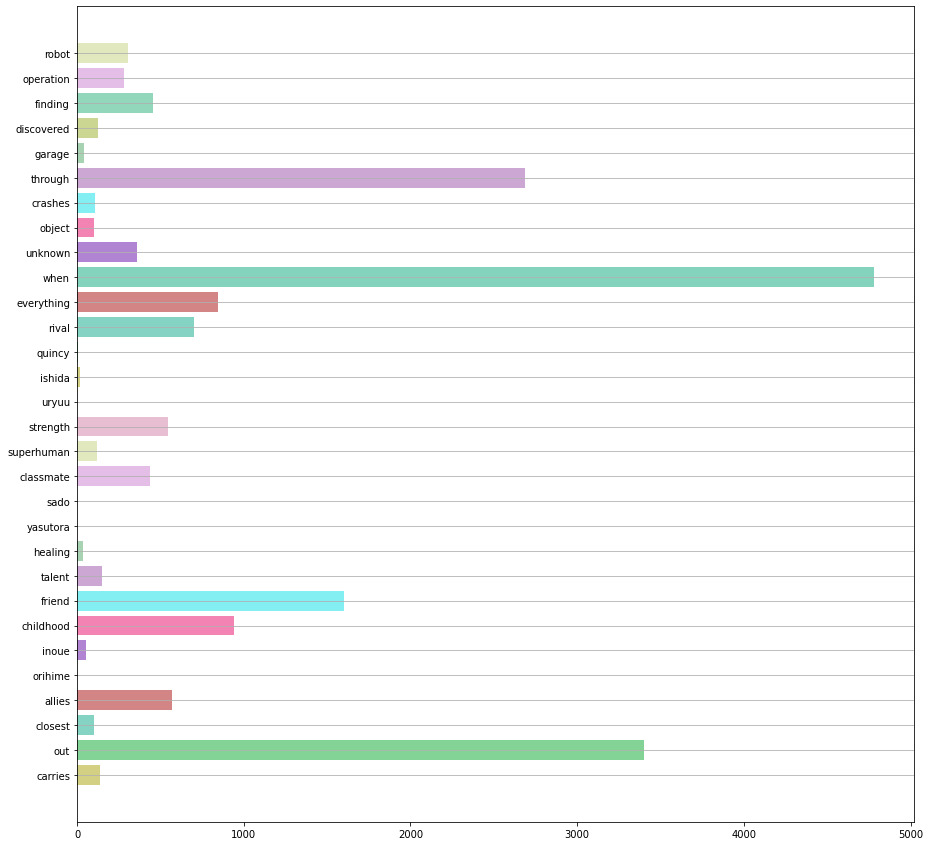

In [46]:
plt.figure(figsize=(15,15))
plt.barh(letra[270:300], nums[270:300], color= list_colors, align='center',alpha=0.5)
plt.grid(axis = 'y')
plt.show()

In [47]:
print(letra + nums)

['after', 'horrific', 'alchemy', 'experiment', 'goes', 'wrong', 'the', 'elric', 'household', 'brothers', 'edward', 'and', 'alphonse', 'are', 'left', 'catastrophic', 'new', 'reality', 'ignoring', 'alchemical', 'principle', 'banning', 'human', 'transmutation', 'boys', 'attempted', 'bring', 'their', 'recently', 'deceased', 'mother', 'back', 'life', 'instead', 'they', 'suffered', 'brutal', 'personal', 'loss', 'body', 'disintegrated', 'while', 'lost', 'leg', 'then', 'sacrificed', 'arm', 'keep', 'soul', 'physical', 'realm', 'binding', 'hulking', 'suit', 'armor', 'with', 'school', 'year', 'comes', 'crowd', 'classmates', 'for', 'final', 'junior', 'high', 'aspiring', 'writer', 'kotarou', 'azumi', 'track', 'team', 'member', 'akane', 'mizuno', 'end', 'same', 'class', 'though', 'initially', 'complete', 'strangers', 'few', 'chance', 'encounters', 'stir', 'innocent', 'desire', 'within', 'hearts', 'yearning', 'gaze', 'fluttering', 'heart', 'hallmarks', 'young', 'love', 'slip', 'into', 'lives', 'fate'

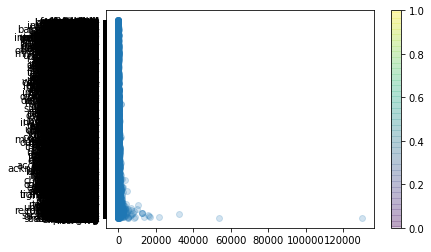

In [48]:
plt.scatter(nums, letra, alpha=0.2, cmap='viridis')
plt.colorbar()
plt.show()

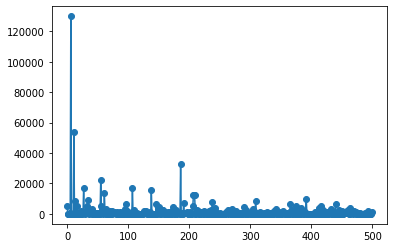

In [49]:
plt.plot(nums[:500], 'o-')
plt.show()

In [50]:
"""with open('/content/input_text_data_cont.txt', 'r') as f:
    texto = f.read()  
no_deseados = [',','.','¡','!','¿','?','(',')','"',"'"]
for char in no_deseados:
    texto = texto.replace(char,'')
palabras = texto.lower().split()

def cuenta_repetidas(p, palabras):
    return {p:palabras.count(p)}
dict_list = [cuenta_repetidas(p, palabras) for p in palabras]

resultados = [i for n, i in enumerate(dict_list) if i not in dict_list[n + 1:]] 

res_ordenados = sorted(resultados, key=lambda d: list(d.values()), reverse=True)"""

'with open(\'/content/input_text_data_cont.txt\', \'r\') as f:\n    texto = f.read()  \nno_deseados = [\',\',\'.\',\'¡\',\'!\',\'¿\',\'?\',\'(\',\')\',\'"\',"\'"]\nfor char in no_deseados:\n    texto = texto.replace(char,\'\')\npalabras = texto.lower().split()\n\ndef cuenta_repetidas(p, palabras):\n    return {p:palabras.count(p)}\ndict_list = [cuenta_repetidas(p, palabras) for p in palabras]\n\nresultados = [i for n, i in enumerate(dict_list) if i not in dict_list[n + 1:]] \n\nres_ordenados = sorted(resultados, key=lambda d: list(d.values()), reverse=True)'

In [51]:
"""for d in resultados:
    for k, v in d.items():
      let.append(k)
      nums.append(v)"""

'for d in resultados:\n    for k, v in d.items():\n      let.append(k)\n      nums.append(v)'

## Descargando GPT-2

Si está volviendo a entrenar un modelo en texto nuevo, primero debe descargar el modelo GPT-2.

Hay tres tamaños lanzados de GPT-2:

* `124M` (predeterminado): el modelo "pequeño", 500 MB en disco.
* `355M`: el modelo "mediano", 1,5 GB en disco.
* `774M`: el modelo "grande", actualmente no se puede ajustar con Colaboratory, pero se puede usar para generar texto a partir del modelo previamente entrenado (ver más adelante en Notebook)
* `1558M`: el verdadero modelo "extra grande". No funcionará si se conecta una GPU K80/P4 a la computadora portátil. (como `774M`, no se puede ajustar).

Los modelos más grandes tienen más conocimiento, pero tardan más en ajustarse y generar texto. Puede especificar qué modelo base usar cambiando `model_name` en las celdas a continuación.



In [52]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 258Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:01, 635kit/s]
Fetching hparams.json: 1.05Mit [00:00, 295Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [01:24, 5.92Mit/s]
Fetching model.ckpt.index: 1.05Mit [00:00, 384Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:01, 722kit/s]
Fetching vocab.bpe: 1.05Mit [00:01, 727kit/s]


In [53]:
!ls

drive		       input_text_data_cont.txt  models
input_text_data_0.txt  input_text_data.txt	 sample_data


##Generar texto con gpt-2

In [54]:

!pip install -q aitextgen==0.5.1

     |████████████████████████████████| 571 kB 32.3 MB/s 
     |████████████████████████████████| 5.8 MB 63.9 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 800 kB 72.0 MB/s 
     |████████████████████████████████| 125 kB 72.5 MB/s 
     |████████████████████████████████| 512 kB 79.5 MB/s 
     |████████████████████████████████| 182 kB 66.1 MB/s 
     |████████████████████████████████| 7.6 MB 71.4 MB/s 


In [55]:
from aitextgen import aitextgen

In [56]:
ai = aitextgen()

INFO:aitextgen:Downloading gpt2 model to /aitextgen.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

INFO:aitextgen:GPT2 loaded with 124M parameters.
INFO:aitextgen:Using the default GPT-2 Tokenizer.


In [57]:
ai.generate()

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


[S]hippo[/S]

[H]e's all about the power of the world and the power of the earth,

a big part of it is the power of the sun.

[X]e's all about the power of the light,

a big part of it is the power of the clouds.

[Y]e's all about the power of the sea,

a big part of it is the power of the wind.

[Z]e's all about the power of the sun,

a big part of it is the power of the moon.

[A]e's all about the power of the moon,

a big part of it is the power of the sun.

[B]e's all about the power of the earth,

a big part of it is the power of the moon.

[C]e's all about the power of the wind,

a big part of it is the power of the moon.

[D]e's all about the power of the stars,

a big part of it is the power of the moon.

[E]e's all


In [58]:
ai.generate(n=3, max_length=100)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


A day after an officer fired his gun at an unarmed black teenager who was resisting arrest, a grand jury has ruled that the shooting was justified.

The grand jury's decision could open the way for a trial that could bring the death penalty to the streets.

The officer used his Taser to stun his unarmed teen, who was taken to a hospital for treatment. He then fired a single shot at the unarmed teen, killing him.

Officer Timothy Kelley, 61,
"He was the kind of guy who would make you feel like you were playing out of his life, which is pretty incredible to me," said one of the people in the room who said he was shocked to hear the news. "He was like a super-human kid."

The man who first brought the news to the media was a former Los Angeles police officer, who says he knew the man he was talking to, but was unaware he was in a relationship with the man who
The US Navy has awarded the Navy an unprecedented $3.5 billion contract to launch unmanned ships to the Atlantic Ocean from Cape Ca

In [59]:
ai.generate(n=3, prompt="I believe in unicorns because", max_length=100)

I believe in unicorns because they are the only way to bring joy in the world. I love unicorns because I love to love to love.

My love of unicorns started with a love for my brother and sisters. The love was intense and intense. It was my family's love and my passion.

I love unicorns because unicorns are my family's love. I love to love to love.

I love unicorns because unicorns are my family's love
I believe in unicorns because of the power of the unicorns," she said last week at a rally outside the South Carolina State Capitol. The event had been billed as a "Women's March on Washington."

Despite the fact that many people in the crowd said they were not thrilled with a presidential candidate, Sanders said he would support the candidate.

"I'm going to support Hillary Clinton, I'm going to support Bernie Sanders. I think they're both great," Sanders said.
I believe in unicorns because they seem to want to know all the answers."

He said the U.S. State Department and U.S. embassies 

In [60]:
ai.generate_to_file(n=10, prompt="I believe in unicorns because", max_length=100, temperature=1.2)

INFO:aitextgen:Generating 10 texts to ATG_20230102_001430_31597962.txt


  0%|          | 0/10 [00:00<?, ?it/s]

## Montaje de Google Drive

La mejor manera de obtener texto de entrada para ser entrenado en la VM de Colaboratory y de obtener el modelo entrenado *fuera* de Colaboratory es enrutarlo a través de Google Drive *primero*.

Ejecutar esta celda (que solo funcionará en Colaboratory) montará su Google Drive personal en la VM, que las celdas posteriores pueden usar para ingresar o sacar datos. (pedirá un código de autenticación; esa autenticación no se guarda en ninguna parte)

In [61]:
gpt2.mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
file_name = "input_text_data_cont.txt"

Si su archivo de texto tiene más de 10 MB, se recomienda cargar ese archivo en Google Drive primero y luego copiar ese archivo de Google Drive a la VM de Colaboratory.

In [63]:
gpt2.copy_file_from_gdrive(file_name)

## Ajuste fino GPT-2

La siguiente celda comenzará el ajuste fino real de GPT-2. Crea una sesión persistente de TensorFlow que almacena la configuración de entrenamiento y luego ejecuta el entrenamiento para la cantidad especificada de "pasos". (para que el ajuste fino se ejecute indefinidamente, configure `pasos = -1`)

Los puntos de control del modelo se guardarán en `/checkpoint/run1` de forma predeterminada. Los puntos de control se guardan cada 500 pasos (se pueden cambiar) y cuando se detiene la celda.

El tiempo de entrenamiento puede expirar después de 4 horas; ¡asegúrate de finalizar el entrenamiento y guardar los resultados para no perderlos!

**NOTA IMPORTANTE:** Si desea volver a ejecutar esta celda, **reinicie primero la máquina virtual** (Tiempo de ejecución -> Reiniciar tiempo de ejecución). Deberá volver a ejecutar las importaciones, pero no volver a copiar los archivos.

Otros parámetros opcionales pero útiles para `gpt2.finetune`:


* **`restore_from`**: Establézcalo en `fresh` para comenzar a entrenar desde el GPT-2 base, o configure en `latest` para reiniciar el entrenamiento desde un punto de control existente.
* **`sample_every`**: número de pasos para imprimir la salida de ejemplo
* **`print_every`**: Número de pasos para imprimir el progreso del entrenamiento.
* **`learning_rate`**: Tasa de aprendizaje para el entrenamiento. (predeterminado `1e-4`, puede bajar a `1e-5` si tiene <1 MB de datos de entrada)
* **`run_name`**: subcarpeta dentro de `checkpoint` para guardar el modelo. Esto es útil si desea trabajar con varios modelos (también deberá especificar `run_name` al cargar el modelo)
* **`overwrite`**: Establézcalo en `True` si desea continuar ajustando un modelo existente (con `restore_from='latest'`) sin crear copias duplicadas.

In [77]:
!ls cd models

ls: cannot access 'cd': No such file or directory
models:
124M


In [78]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [79]:
#import tensorflow as tf
#run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

In [67]:
"""model_name="355M"
steps=20 
restore_from="fresh" 
overwrite=True
print_every=1
sample_every=100000
sample_length=100
save_every=20
sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              dataset=file_name,
              model_name=model_name,
              steps=steps,
              restore_from=restore_from,
              overwrite=overwrite,
              print_every=print_every,
              sample_every=sample_every,
              save_every=save_every, 
              sample_length=sample_length
              )
print("Finetuning Complete")"""

'model_name="355M"\nsteps=20 \nrestore_from="fresh" \noverwrite=True\nprint_every=1\nsample_every=100000\nsample_length=100\nsave_every=20\nsess = gpt2.start_tf_sess()\ngpt2.finetune(sess,\n              dataset=file_name,\n              model_name=model_name,\n              steps=steps,\n              restore_from=restore_from,\n              overwrite=overwrite,\n              print_every=print_every,\n              sample_every=sample_every,\n              save_every=save_every, \n              sample_length=sample_length\n              )\nprint("Finetuning Complete")'

In [68]:
sess = gpt2.start_tf_sess()

gpt_2 = gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=1000,
              run_name='generate_sinopsis_anime',
              restore_from='latest',
              print_every=15,
              sample_every=800,
              save_every=1000
              )

Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:11<00:00, 11.54s/it]


dataset has 2776319 tokens
Training...
[15 | 38.15] loss=2.98 avg=2.98
[30 | 71.65] loss=2.85 avg=2.91
[45 | 104.87] loss=2.50 avg=2.77
[60 | 138.04] loss=2.44 avg=2.69
[75 | 171.32] loss=1.89 avg=2.53
[90 | 204.55] loss=1.87 avg=2.41
[105 | 237.78] loss=1.27 avg=2.24
[120 | 271.03] loss=1.08 avg=2.09
[135 | 304.31] loss=1.15 avg=1.98
[150 | 337.57] loss=0.60 avg=1.84
[165 | 370.83] loss=0.68 avg=1.73
[180 | 404.09] loss=0.24 avg=1.60
[195 | 437.34] loss=0.26 avg=1.49
[210 | 470.55] loss=0.20 avg=1.39
[225 | 503.82] loss=0.23 avg=1.31
[240 | 537.03] loss=0.35 avg=1.24
[255 | 570.25] loss=0.16 avg=1.17
[270 | 603.49] loss=0.19 avg=1.12
[285 | 636.70] loss=0.16 avg=1.06
[300 | 669.92] loss=0.14 avg=1.01
[315 | 703.15] loss=0.19 avg=0.97
[330 | 736.35] loss=0.18 avg=0.93
[345 | 769.56] loss=0.15 avg=0.89
[360 | 802.77] loss=0.12 avg=0.85
[375 | 835.98] loss=0.18 avg=0.82
[390 | 869.20] loss=0.11 avg=0.79
[405 | 902.40] loss=0.15 avg=0.77
[420 | 935.61] loss=0.10 avg=0.74
[435 | 968.85] lo

Después de entrenar el modelo, puede copiar la carpeta del punto de control en su propio Google Drive.

Si desea descargarlo en su computadora personal, se recomienda enfáticamente que primero lo copie allí y luego lo descargue desde Google Drive. La carpeta del punto de control se copia como un archivo comprimido `.rar`; puedes descargarlo y descomprimirlo localmente.

In [80]:
gpt2.copy_checkpoint_to_gdrive(run_name='generate_sinopsis_anime')

## Cargue un punto de control de modelo entrenado

Al ejecutar la siguiente celda, se copiará el archivo de punto de control `.rar` de su Google Drive a la VM de Colaboratory.

In [81]:
gpt2.copy_checkpoint_from_gdrive(run_name='generate_sinopsis_anime')

La siguiente celda le permitirá cargar el punto de control del modelo reentrenado + los metadatos necesarios para generar texto.

**NOTA IMPORTANTE:** Si desea volver a ejecutar esta celda, **reinicie primero la máquina virtual** (Tiempo de ejecución -> Reiniciar tiempo de ejecución). Deberá volver a ejecutar las importaciones, pero no volver a copiar los archivos.

In [82]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [83]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='generate_sinopsis_anime')

Loading checkpoint checkpoint/generate_sinopsis_anime/model-1000


## Generar texto a partir del modelo entrenado

Después de entrenar el modelo o cargar un modelo vuelto a entrenar desde el punto de control, ahora puede generar texto. `generar` genera un solo texto del modelo cargado.

In [84]:
gpt2.generate(sess, run_name='generate_sinopsis_anime')

As he eagerly begins his training, Yotarou meets Konatsu, a young woman who has been under Yakumo's care ever since her beloved father Sukeroku Yuurakutei, another prolific rakugo performer, passed away. Through an encounter between the two, Yakumo and his new Rakugo partner Arata Nishikata, better known by her pseudonym Poppin, managed to break the ice between the rakugo and traditional Japanese cooking. Although the tenderness and the coloration of their love for each other is something that will carry on long after their reunion.


However, with the appearance of a mysterious new cultivator, the demonic arm investigation leads Wei Wuxian and Lan Wangji to a plot that threatens the cultivation world as they know it. The gravity of the new situation escalates when the two find it involves the chief cultivator of the renowned Lanling Jin Sect,Jin Guangyao.
[Written by MAL Rewrite]"

"The Great War finally came to an end after four long years of conflict; fractured in two, the continent

Si está creando una API basada en su modelo y necesita pasar el texto generado a otra parte, puede hacer `text = gpt2.generate(sess, return_as_list=True)[0]`

También puede pasar un `prefijo` a la función de generación para obligar al texto a comenzar con una secuencia de caracteres dada y generar texto a partir de ahí (bien si agrega un indicador cuando comienza el texto).

También puede generar varios textos a la vez especificando `nsamples`. Exclusivo de GPT-2, puede pasar un `batch_size` para generar múltiples muestras en paralelo, proporcionando una aceleración masiva (en Colaboratory, establezca un máximo de 20 para `batch_size`).

Otros parámetros opcionales pero útiles para `gpt2.generate` y amigos:

* **`length`**: Número de tokens a generar (por defecto 1023, el máximo)
* **`temperatura`**: Cuanto más alta sea la temperatura, más loco será el texto (predeterminado 0.7, recomendado mantener entre 0.7 y 1.0)
* **`top_k`**: limita las conjeturas generadas a las conjeturas *k* principales (el valor predeterminado es 0, lo que desactiva el comportamiento; si la salida generada es muy loca, es posible que desee establecer `top_k=40`)
* **`top_p`**: Muestreo de núcleo: limita las conjeturas generadas a una probabilidad acumulativa. (obtiene buenos resultados en un conjunto de datos con `top_p=0.9`)
* **`truncate`**: trunca el texto de entrada hasta una secuencia determinada, excluyendo esa secuencia (por ejemplo, si `truncate='<|endoftext|>'`, el texto devuelto incluirá todo lo anterior al primer `<|endoftext| >`). Puede ser útil combinar esto con una "longitud" más pequeña si los textos de entrada son cortos.
* **`include_prefix`**: si usa `truncate` e `include_prefix=False`, el `prefijo` especificado no se incluirá en el texto devuelto.

In [85]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [86]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='generate_sinopsis_anime')

Loading checkpoint checkpoint/generate_sinopsis_anime/model-1000


In [87]:
gpt2.generate(sess,
              length=160,
              temperature=0.8,
              run_name='generate_sinopsis_anime',
              prefix="To fly, ",
              nsamples=2,
              batch_size=2
              )

To fly, ichthyosis, a train is delayed by a dangerous new cultivator, the Nine Moons, who secretly harbors strong anti,imperial,national,pirates,themed resentment towards Japan. To add to the drama, ichthyosis also undergoes a massive transformation, seeing to the devastation caused by the Third World War and the brutal subjugation that it brings.
"Kousei Arima is a child prodigy known as the Human Metronome for playing the piano with precision and perfection. Guided by a strict mother and rigorous training, Kousei dominates every competition he enters, earning the admiration of his musical peers and praise from audiences. When his mother suddenly passes away, the subsequent trauma makes him unable to hear the sound of a piano, and he never takes the
To fly, 《Major Motoko Kusanagi, stops short of killing, but she does so in an attempt to repay her mentor Bakuman, the world's most valuable magical expert. Rather than risk her life and/or of course, money, Kusanagi instead decides to tak

Para la generación masiva, puede generar una gran cantidad de texto en un archivo y ordenar las muestras localmente en su computadora. La siguiente celda generará un archivo de texto generado con una marca de tiempo única.

¡Puede volver a ejecutar las celdas tantas veces como desee para obtener aún más textos generados!

In [88]:
gen_file = 'gpt2_gentext_{:%Y%m%d_%H%M%S}.txt'.format(datetime.utcnow())

gpt2.generate_to_file(sess,
                      destination_path=gen_file,
                      length=500,
                      run_name='generate_sinopsis_anime',
                      temperature=0.5,
                      nsamples=10,
                      batch_size=5
                      )

In [91]:
# may have to run twice to get file to download
files.download(gen_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
gpt2.generate(sess,
              length=500,
              run_name='generate_sinopsis_anime',
              temperature=0.5,
              nsamples=10,
              batch_size=5
              )

In the year 0068 of the Universal Century, Casval Rem Deikun's life is thrown into chaotic disarray after the assassination of his father, a prolific figure in the crusade towards civil rights for people who live away from the Earth's surface. Casval and his sister Artesia receive aid from soldiers who were loyal to their father, and the siblings are whisked away from their home, separated, and thrown into a twisted fate that sees them come into their own as soldiers and adults.

Years before stealing the name Char Aznable or his Red Comet moniker, Casval must contend with the rise of a militarized version of his father's ideology and his own vengeful nature as intergalactic war molds him into a legendary mobile suit pilot.

[Written by MAL Rewrite]"
"As Tooru continues on her quest to become the greatest maid and Kanna Kamui fully immerses in her life as an elementary school student, there is not a dull day in the Kobayashi household with mischief being a daily staple. On one such day

## Generar texto a partir del modelo preentrenado

* Elemento de la lista
* Elemento de la lista



Si desea generar texto a partir del modelo preentrenado, no de un modelo ajustado, pase `model_name` a `gpt2.load_gpt2()` y `gpt2.generate()`.

Esta es actualmente la única forma de generar texto de los modelos 774M o 1558M con este portátil.

# Etcétera

Si la computadora portátil tiene errores (p. ej., GPU Sync Fail), fuerza el cierre de la máquina virtual de Colaboratory y reiníciala con el siguiente comando:

In [ ]:
!kill -9 -1

#*LSTM* Generar text



##Importar Librerias

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import string, os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# set seeds for reproducability
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(2)
seed(1)
# keras module for building LSTM 
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku

In [ ]:
def clean_text(txt):
    txt = "".join(t for t in txt  if t not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

In [ ]:
f = open("/content/input_text_data_cont.txt", "r")

In [ ]:
corpus = [clean_text(x) for x in f]
print(corpus[:10])

['after a horrific alchemy experiment goes wrong in the elric household brothers edward and alphonse are left in a catastrophic new reality ignoring the alchemical principle banning human transmutation the boys attempted to bring their recently deceased mother back to life instead they suffered brutal personal loss alphonses body disintegrated while edward lost a leg and then sacrificed an arm to keep alphonses soul in the physical realm by binding it to a hulking suit of armor\n', 'with a new school year comes a new crowd of classmates and for their final year of junior high aspiring writer kotarou azumi and track team member akane mizuno end up in the same class though initially complete strangers a few chance encounters stir an innocent desire within their hearts a yearning gaze a fluttering heartthe hallmarks of young love slip into their lives as fate brings their paths to a cross\n', '\n', '\n', 'the brothers are rescued by their neighbor pinako rockbell and her granddaughter win

In [ ]:
tokenizer = Tokenizer()
def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to a token sequence 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [ ]:
inp_sequences, total_words = get_sequence_of_tokens(corpus)
print(inp_sequences[:10])

[[38, 5], [38, 5, 1436], [38, 5, 1436, 2961], [38, 5, 1436, 2961, 6363], [38, 5, 1436, 2961, 6363, 724], [38, 5, 1436, 2961, 6363, 724, 905], [38, 5, 1436, 2961, 6363, 724, 905, 7], [38, 5, 1436, 2961, 6363, 724, 905, 7, 1], [38, 5, 1436, 2961, 6363, 724, 905, 7, 1, 9496], [38, 5, 1436, 2961, 6363, 724, 905, 7, 1, 9496, 2426]]


In [ ]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

In [ ]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    # ----------Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    # ----------Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    # ----------Add Output Layer
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model